# Conduct an in-depth Exploratory Data Analysis on a complex dataset. Focus on understanding data distributions, identifying missing values, detecting outliers, and uncovering relationships between variables. Utilize visualizations like histograms, box plots, and heatmaps to support your findings.
Resources :
https://www.kaggle.com/code/junaiddata35/titanic-dataset-exploratory-data-analysis-eda

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Step 2: Load Dataset
df = pd.read_csv("titanic.csv")  # Make sure titanic.csv is in the same folder
print("Data Shape:", df.shape)
df.head()


Data Shape: (418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
# Check data info
df.info()

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


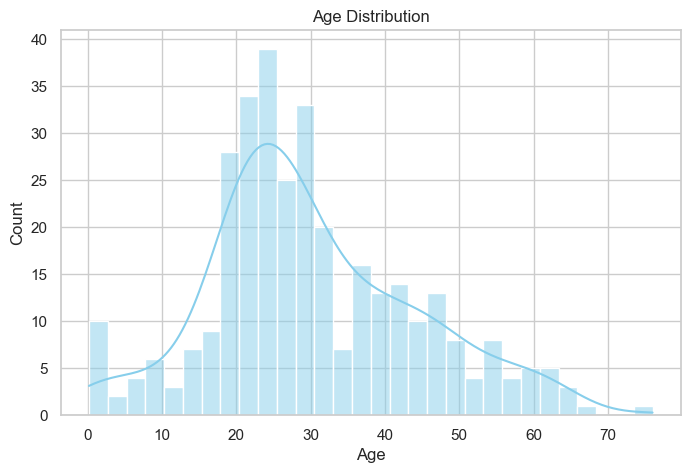

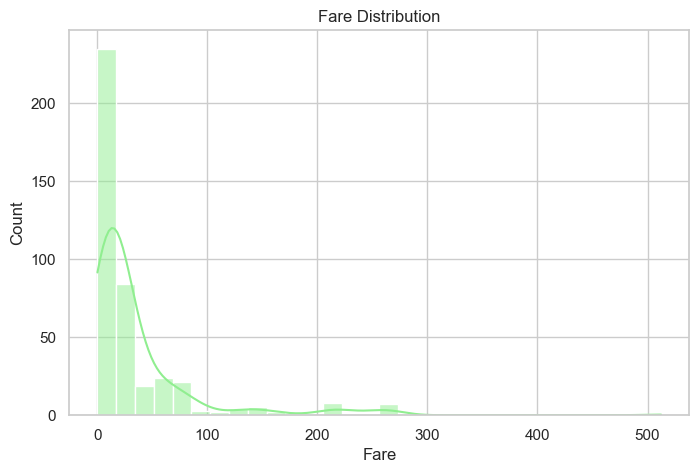

C:\Users\Preeti Kuntal\AppData\Local\Temp\ipykernel_28564\828832694.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='pastel')


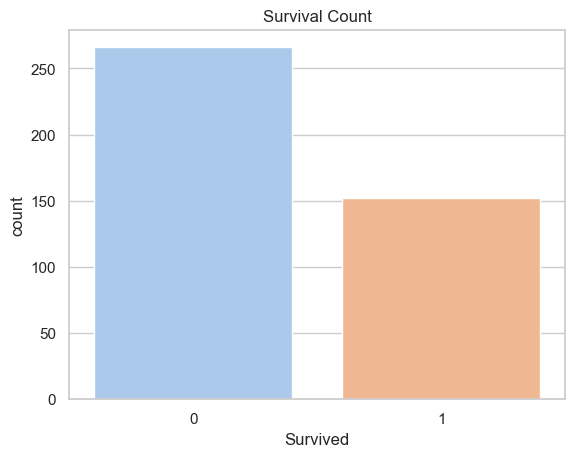

C:\Users\Preeti Kuntal\AppData\Local\Temp\ipykernel_28564\828832694.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='coolwarm')


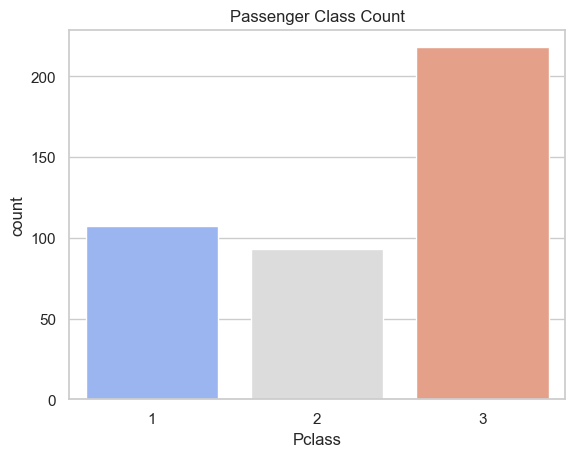

In [11]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

# Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=30, kde=True, color='lightgreen')
plt.title("Fare Distribution")
plt.show()

# Countplot - Survived
sns.countplot(x='Survived', data=df, palette='pastel')
plt.title("Survival Count")
plt.show()

# Countplot - Pclass
sns.countplot(x='Pclass', data=df, palette='coolwarm')
plt.title("Passenger Class Count")
plt.show()


In [13]:
# Fill missing age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Fill embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify again
df.isnull().sum()


C:\Users\Preeti Kuntal\AppData\Local\Temp\ipykernel_28564\3706390143.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Preeti Kuntal\AppData\Local\Temp\ipykernel_28564\3706390143.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

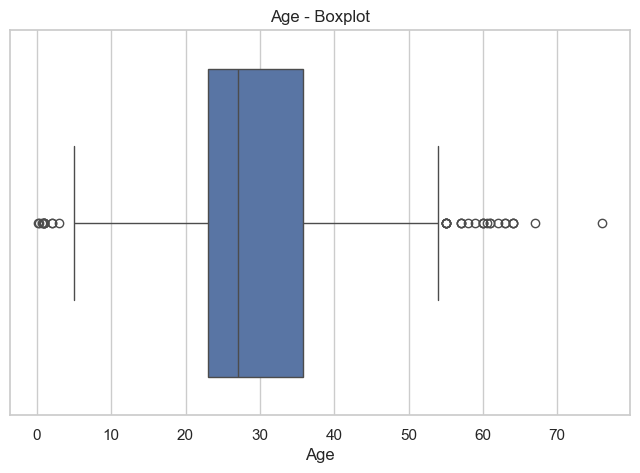

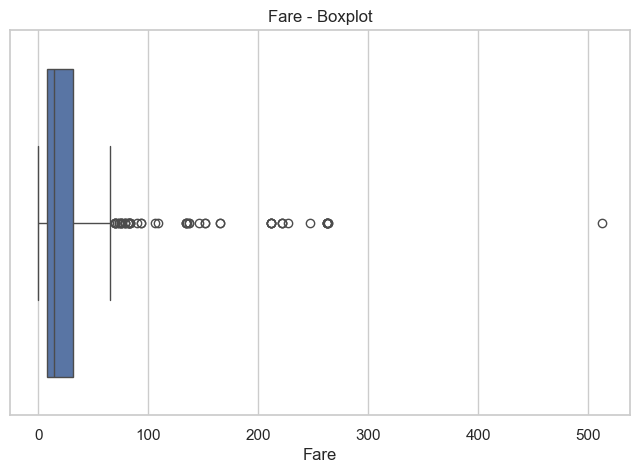

In [14]:
# Boxplot - Age
plt.figure(figsize=(8,5))
sns.boxplot(x='Age', data=df)
plt.title("Age - Boxplot")
plt.show()

# Boxplot - Fare
plt.figure(figsize=(8,5))
sns.boxplot(x='Fare', data=df)
plt.title("Fare - Boxplot")
plt.show()


C:\Users\Preeti Kuntal\AppData\Local\Temp\ipykernel_28564\292210923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')


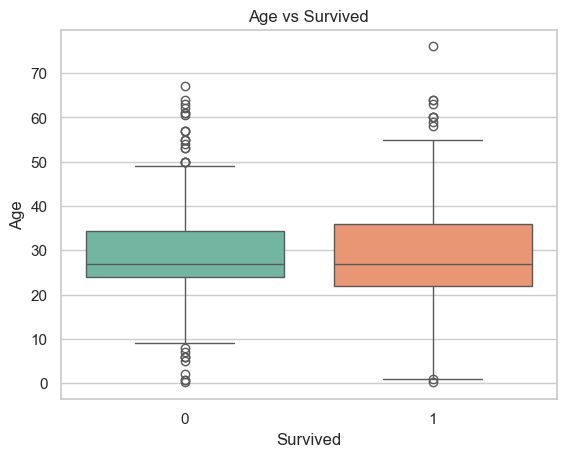

C:\Users\Preeti Kuntal\AppData\Local\Temp\ipykernel_28564\292210923.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='Set3')


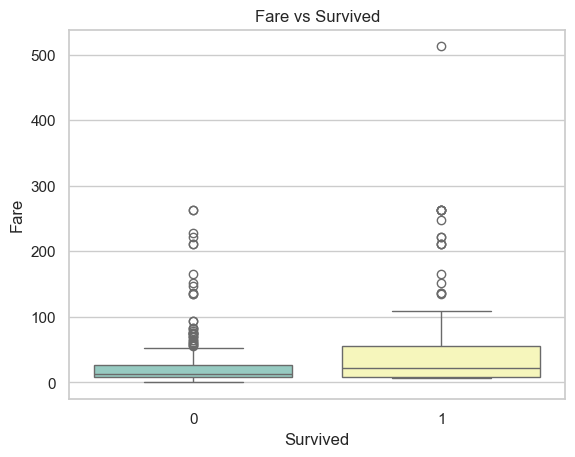

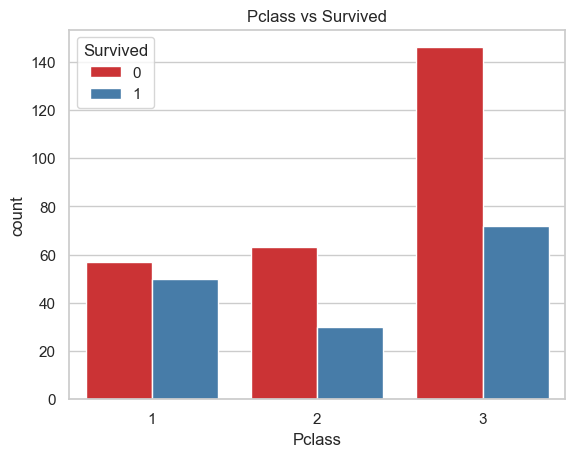

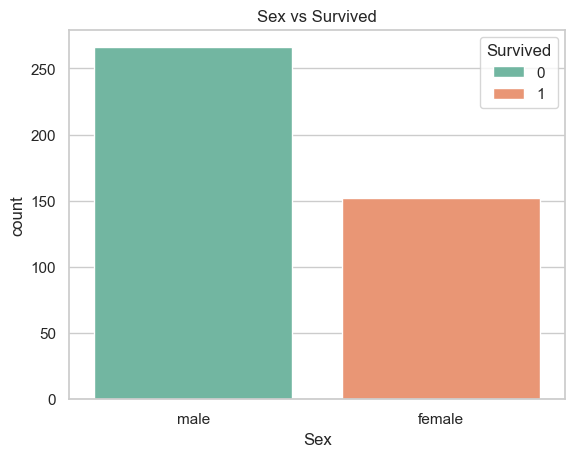

In [15]:
# Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title("Age vs Survived")
plt.show()

# Fare vs Survived
sns.boxplot(x='Survived', y='Fare', data=df, palette='Set3')
plt.title("Fare vs Survived")
plt.show()

# Pclass vs Survived
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title("Pclass vs Survived")
plt.show()

# Sex vs Survived
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title("Sex vs Survived")
plt.show()


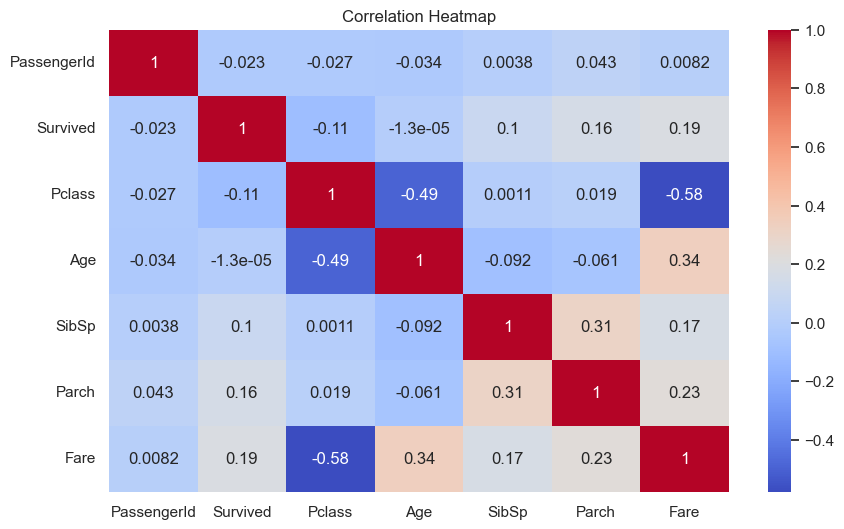

In [7]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\Preeti Kuntal\AppData\Local\Temp\ipykernel_28564\4246674864.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['is_alone'].loc[df['Family_size'] > 1] = 0
C:\Users\Preeti Kuntal\AppData\Local\Temp\ipykernel_28564\4246674864.py:6:

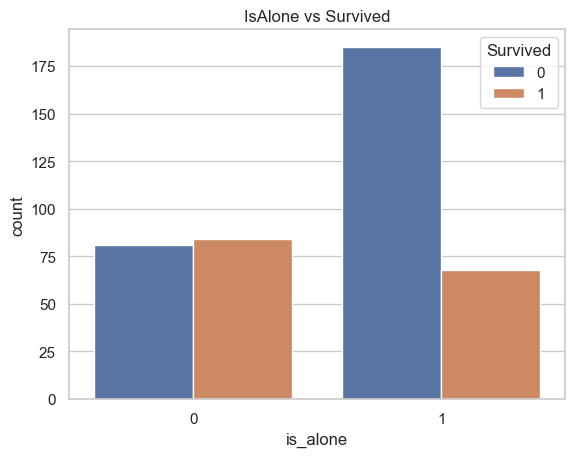

In [17]:
# Create Family Size
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone
df['is_alone'] = 1  # default: alone
df['is_alone'].loc[df['Family_size'] > 1] = 0

# Check impact
sns.countplot(x='is_alone', hue='Survived', data=df)
plt.title("IsAlone vs Survived")
plt.show()
